## Importiing all the required libraries

In [1]:
import imdlib as imd

import matplotlib.pyplot as plt

import numpy as np

import cartopy.feature as cfeature

import cartopy.crs as ccrs

import xarray as xr

import pandas as pd


## Opening the dataset

In [2]:

ds = xr.open_dataset('rainfall_imd_data_1980_2022.nc')

ds


<xarray.Dataset>
Dimensions:  (time: 15706, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-12-31
Data variables:
    rain     (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-06-17 15:07:51.727411 Python
    references:   
    comment:      
    crs:          epsg:4326

## Removing the nan values

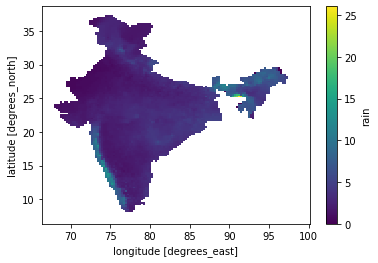

In [3]:

#### In IMD binary files, nan values are given by -999 value 

ds = ds.where(ds['rain'] != -999.)                                        # Remove NaN values

ds['rain'].mean('time').plot()


## SLICING THE JJAS MONTH OF THE YEAR

In [4]:

### Selecting only the JJA months of the years

ds_JJAS = ds.sel(time=((ds.time.dt.month >= 6) & (ds.time.dt.month <= 9)))
ds_JJAS = ds_JJAS.where(ds_JJAS['rain'] != -999)

ds_JJAS



<xarray.Dataset>
Dimensions:  (time: 5246, lat: 129, lon: 135)
Coordinates:
  * lat      (lat) float64 6.5 6.75 7.0 7.25 7.5 ... 37.5 37.75 38.0 38.25 38.5
  * lon      (lon) float64 66.5 66.75 67.0 67.25 67.5 ... 99.25 99.5 99.75 100.0
  * time     (time) datetime64[ns] 1980-06-01 1980-06-02 ... 2022-09-30
Data variables:
    rain     (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.7
    title:        IMD gridded data
    source:       https://imdpune.gov.in/
    history:      2023-06-17 15:07:51.727411 Python
    references:   
    comment:      
    crs:          epsg:4326

In [5]:

pd.unique(ds_JJAS.time.dt.month.values.ravel())


array([6, 7, 8, 9], dtype=int64)

## Total no. of days that the rainfall exceeds 90th percentile

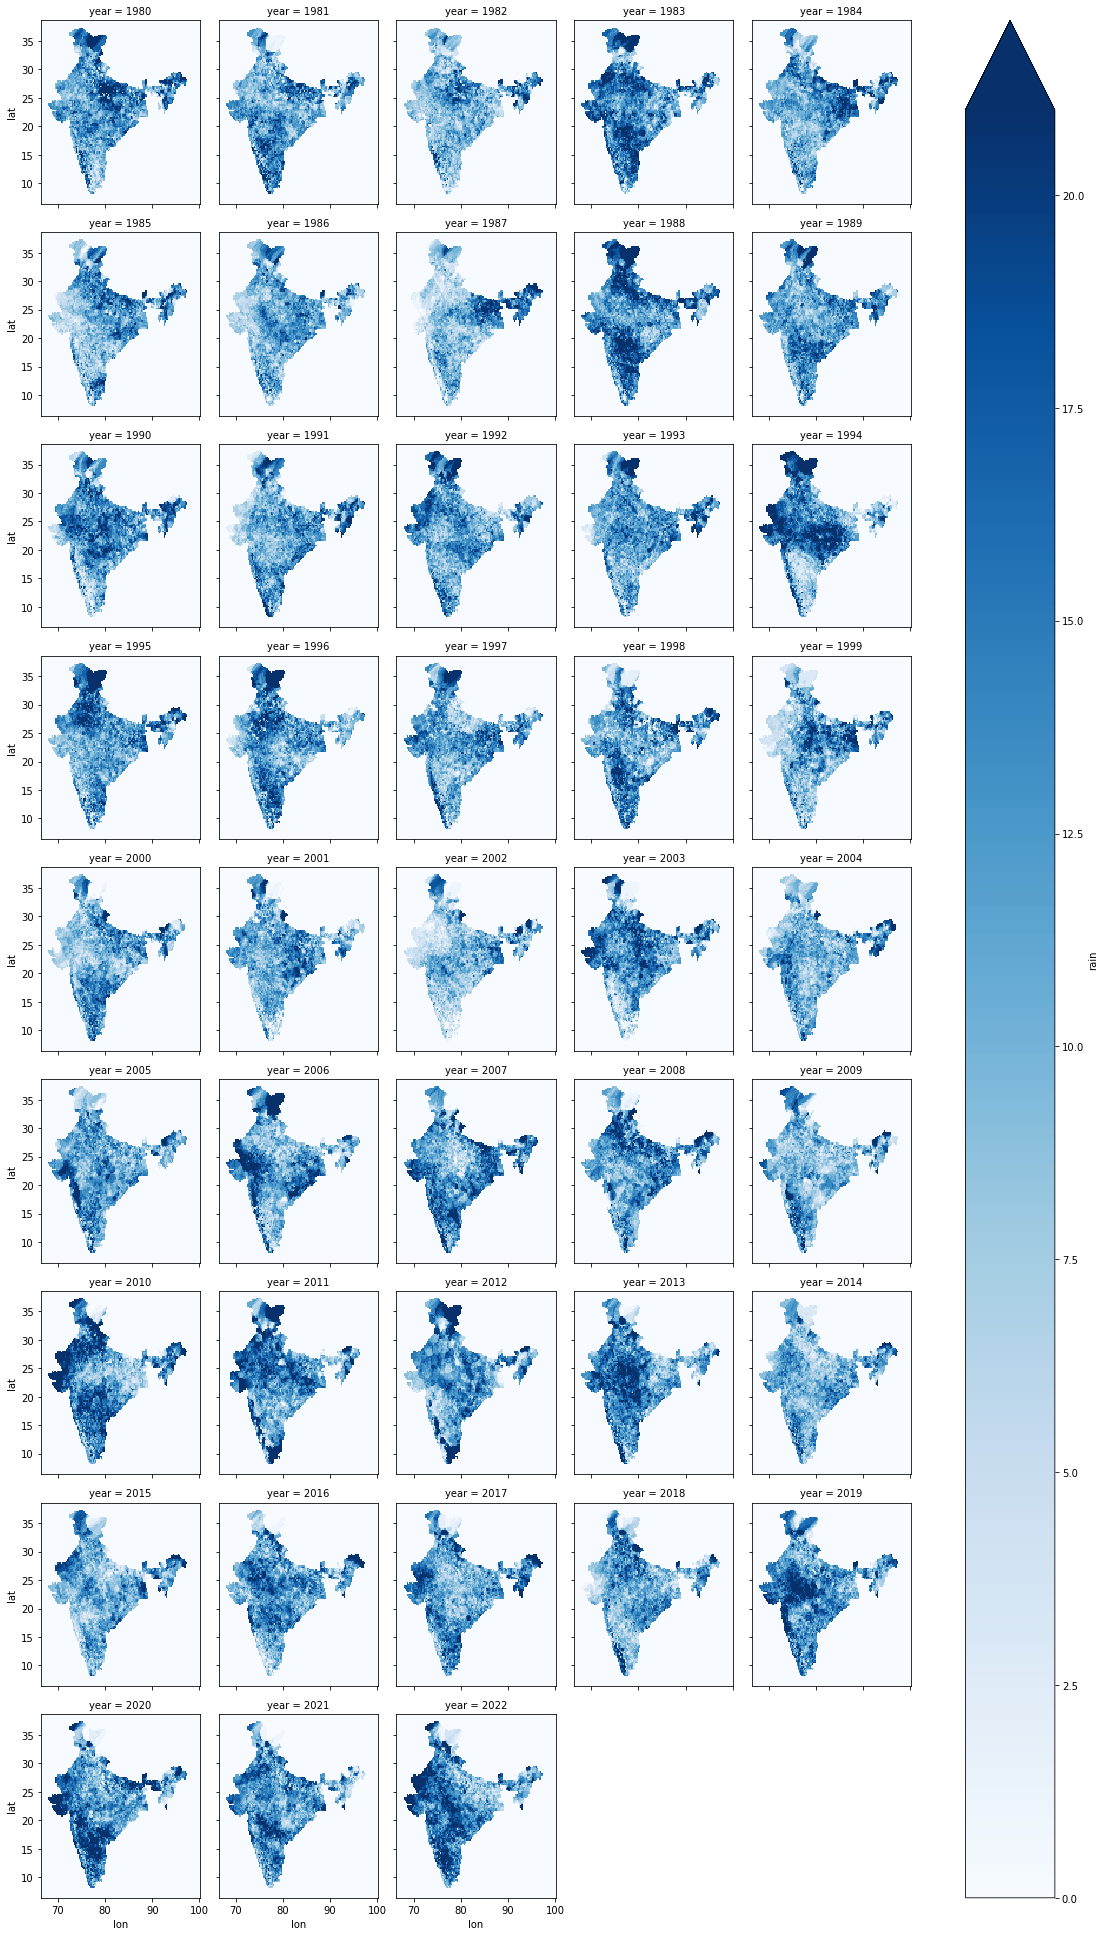

In [6]:

rain_90th_perc = ds_JJAS['rain'].quantile(0.9, dim='time')              # Calculate the 90th percentile of rainfall

rain_exceeds_90th_perc = ds_JJAS['rain'] > rain_90th_perc               # Create a binary mask for rainfall > 90th percentile

rain_exceeds_90th_perc = rain_exceeds_90th_perc.compute()               # Compute the variable 'rain_exceeds_90th_perc'


# Calculate the total number of days exceeding the 90th percentile by year

total_no_days_exceeds_90th_perc = rain_exceeds_90th_perc.groupby('time.year').sum(dim='time') 

total_no_days_exceeds_90th_perc.plot(x='lon', y='lat', col='year', col_wrap=5, cmap='Blues', robust=True)   


# Plotting

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()



## Total no. of events where there was a consecutive rainfall exceeding 90th percentile - calculated from 1980 to 2022

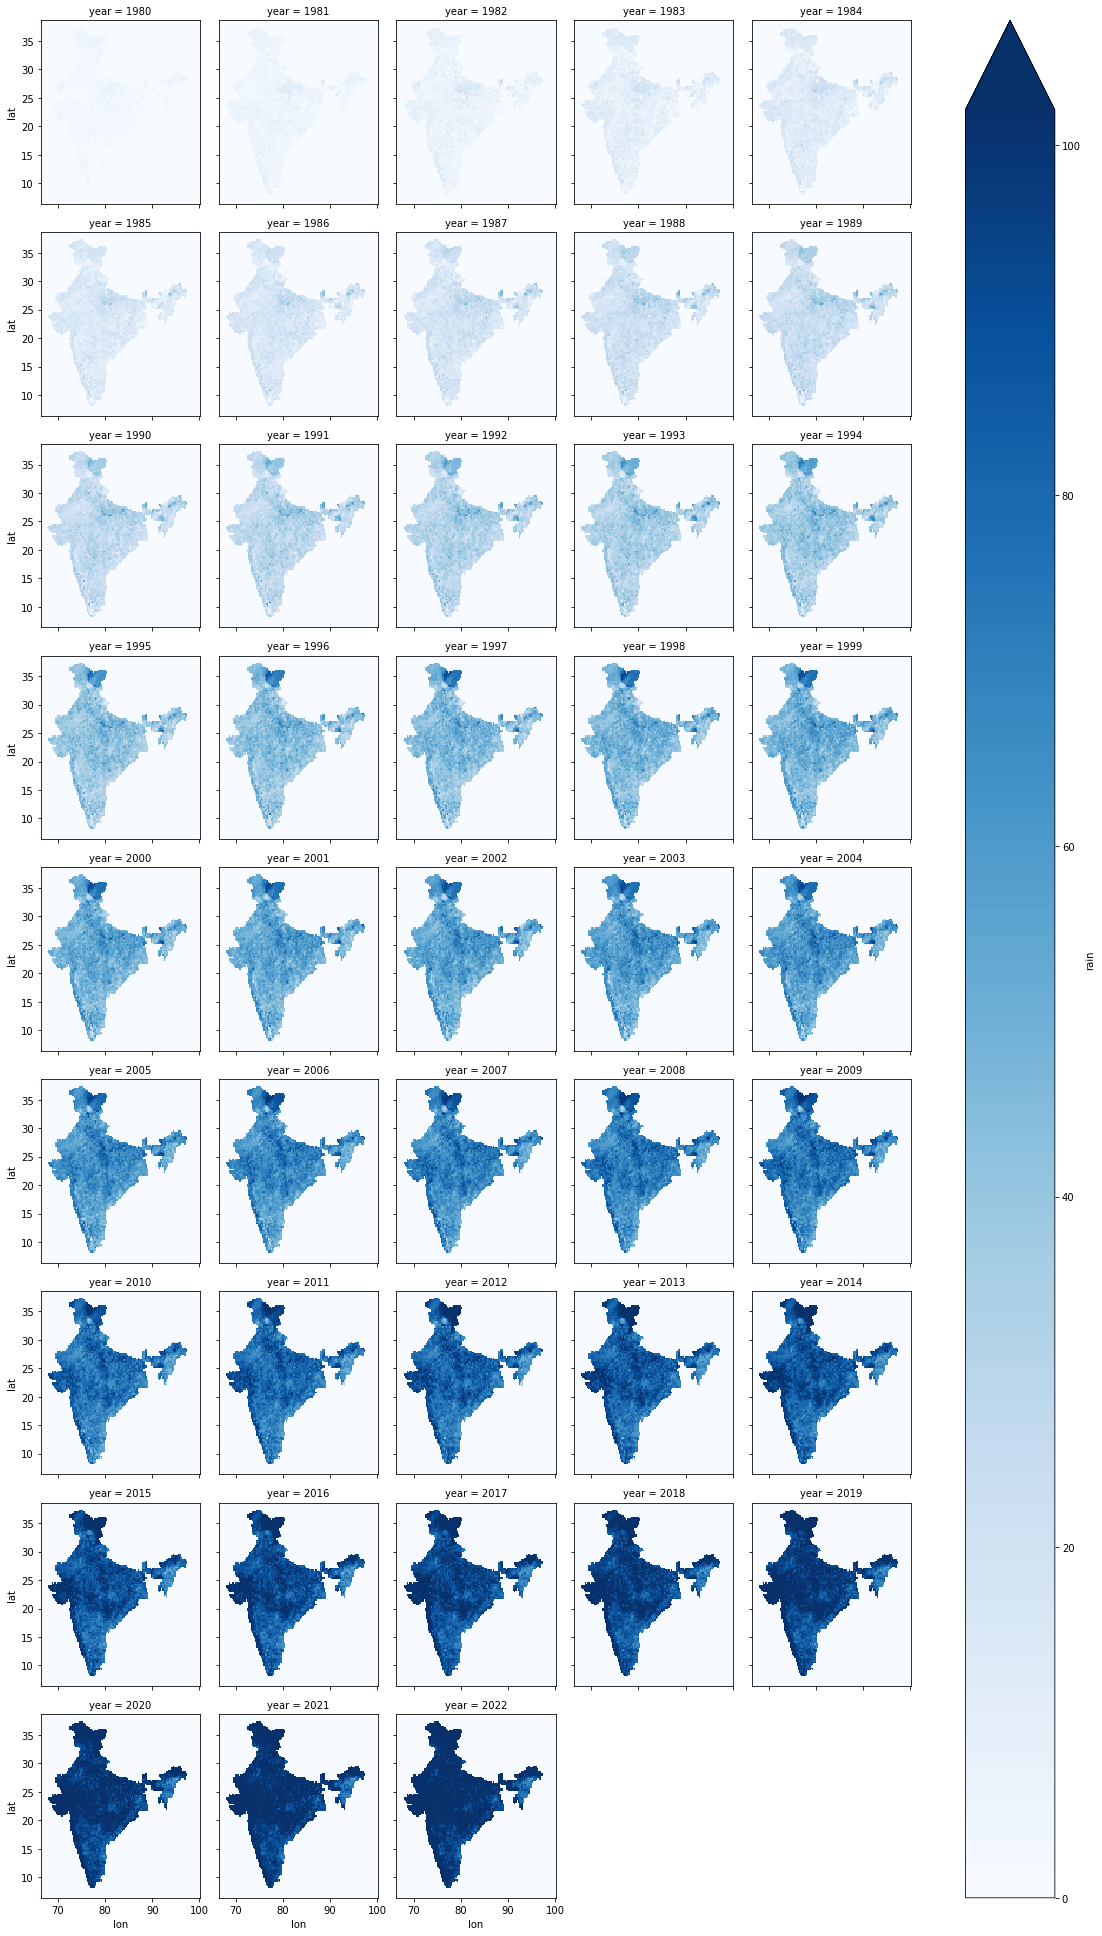

In [7]:

rain_90th_perc = ds_JJAS['rain'].quantile(0.9, dim='time')              # Calculate the 90th percentile of rainfall

rain_exceeds_90th_perc = ds_JJAS['rain'] > rain_90th_perc               # Create a binary mask for rainfall > 90th percentile

rain_exceeds_90th_perc = rain_exceeds_90th_perc.compute()               # Compute the variable 'rain_exceeds_90th_perc'


## Calculate the no. of events where there was consecutive rainfall exceeding 90th percentile

consecutive_events = (rain_exceeds_90th_perc & (rain_exceeds_90th_perc == rain_exceeds_90th_perc.shift(time=1)) & (rain_exceeds_90th_perc != rain_exceeds_90th_perc.shift(time=2))).cumsum(dim='time')

num_events = consecutive_events.groupby('time.year').max(dim='time')


# Plotting

num_events.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, cmap = 'Blues', robust = True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


## Total no. of events where there was a consecutive rainfall exceeding 90th percentile - calculated YEARWISE from 1980 to 2022

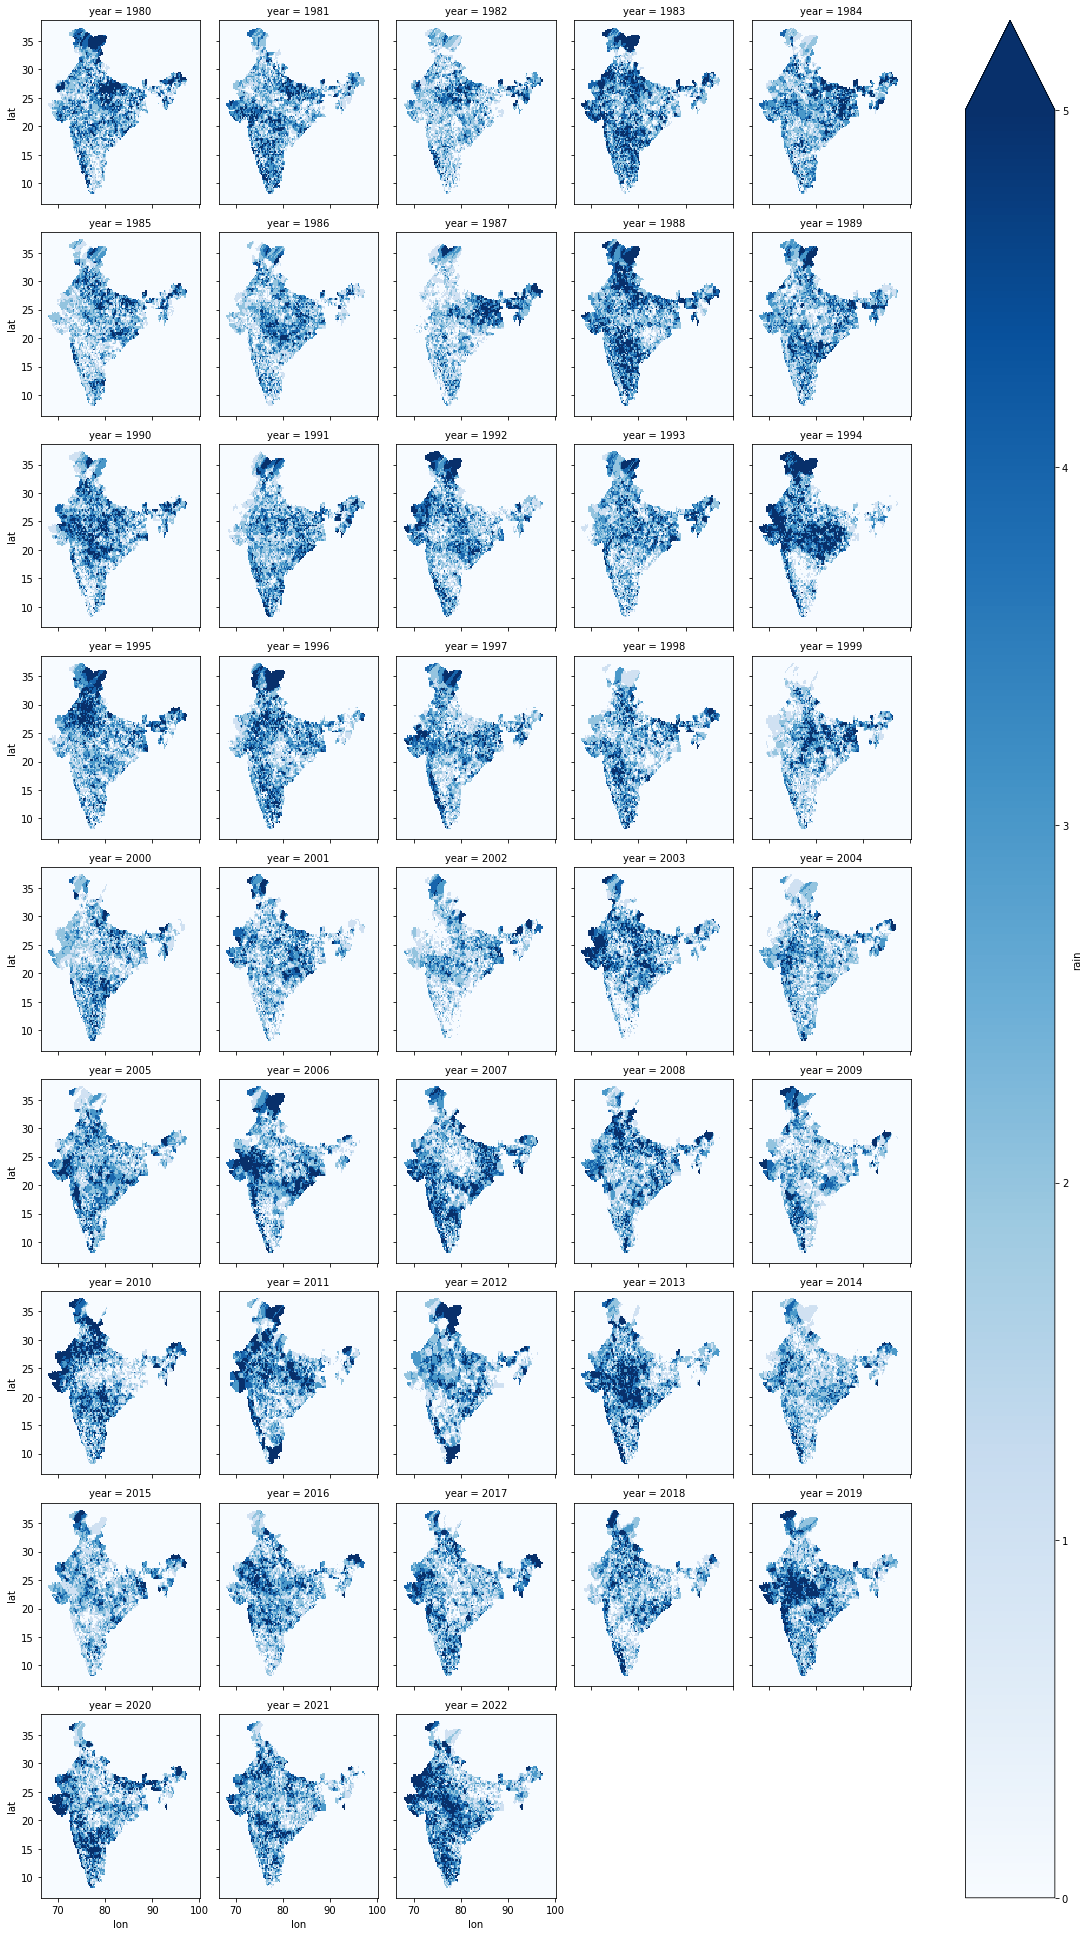

In [8]:

rain_90th_perc = ds_JJAS['rain'].quantile(0.9, dim='time')              # Calculate the 90th percentile of rainfall

rain_exceeds_90th_perc = ds_JJAS['rain'] > rain_90th_perc               # Create a binary mask for rainfall > 90th percentile

rain_exceeds_90th_perc = rain_exceeds_90th_perc.compute()               # Compute the variable 'rain_exceeds_90th_perc'


## Calculate the no. of events where there was consecutive rainfall exceeding 90th percentile

consecutive_events_yearwise = (rain_exceeds_90th_perc & (rain_exceeds_90th_perc == rain_exceeds_90th_perc.shift(time=1)) & (rain_exceeds_90th_perc != rain_exceeds_90th_perc.shift(time=2))).groupby('time.year').cumsum(dim='time')

num_events_yearwise = consecutive_events_yearwise.groupby('time.year').max(dim='time')


# Plotting

num_events_yearwise.plot(x = 'lon', y = 'lat', col = 'year', col_wrap = 5, cmap = 'Blues', robust = True)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()




### Total no. of days rainfall exceeded 90th percentile - Monthwise

<Figure size 432x288 with 0 Axes>

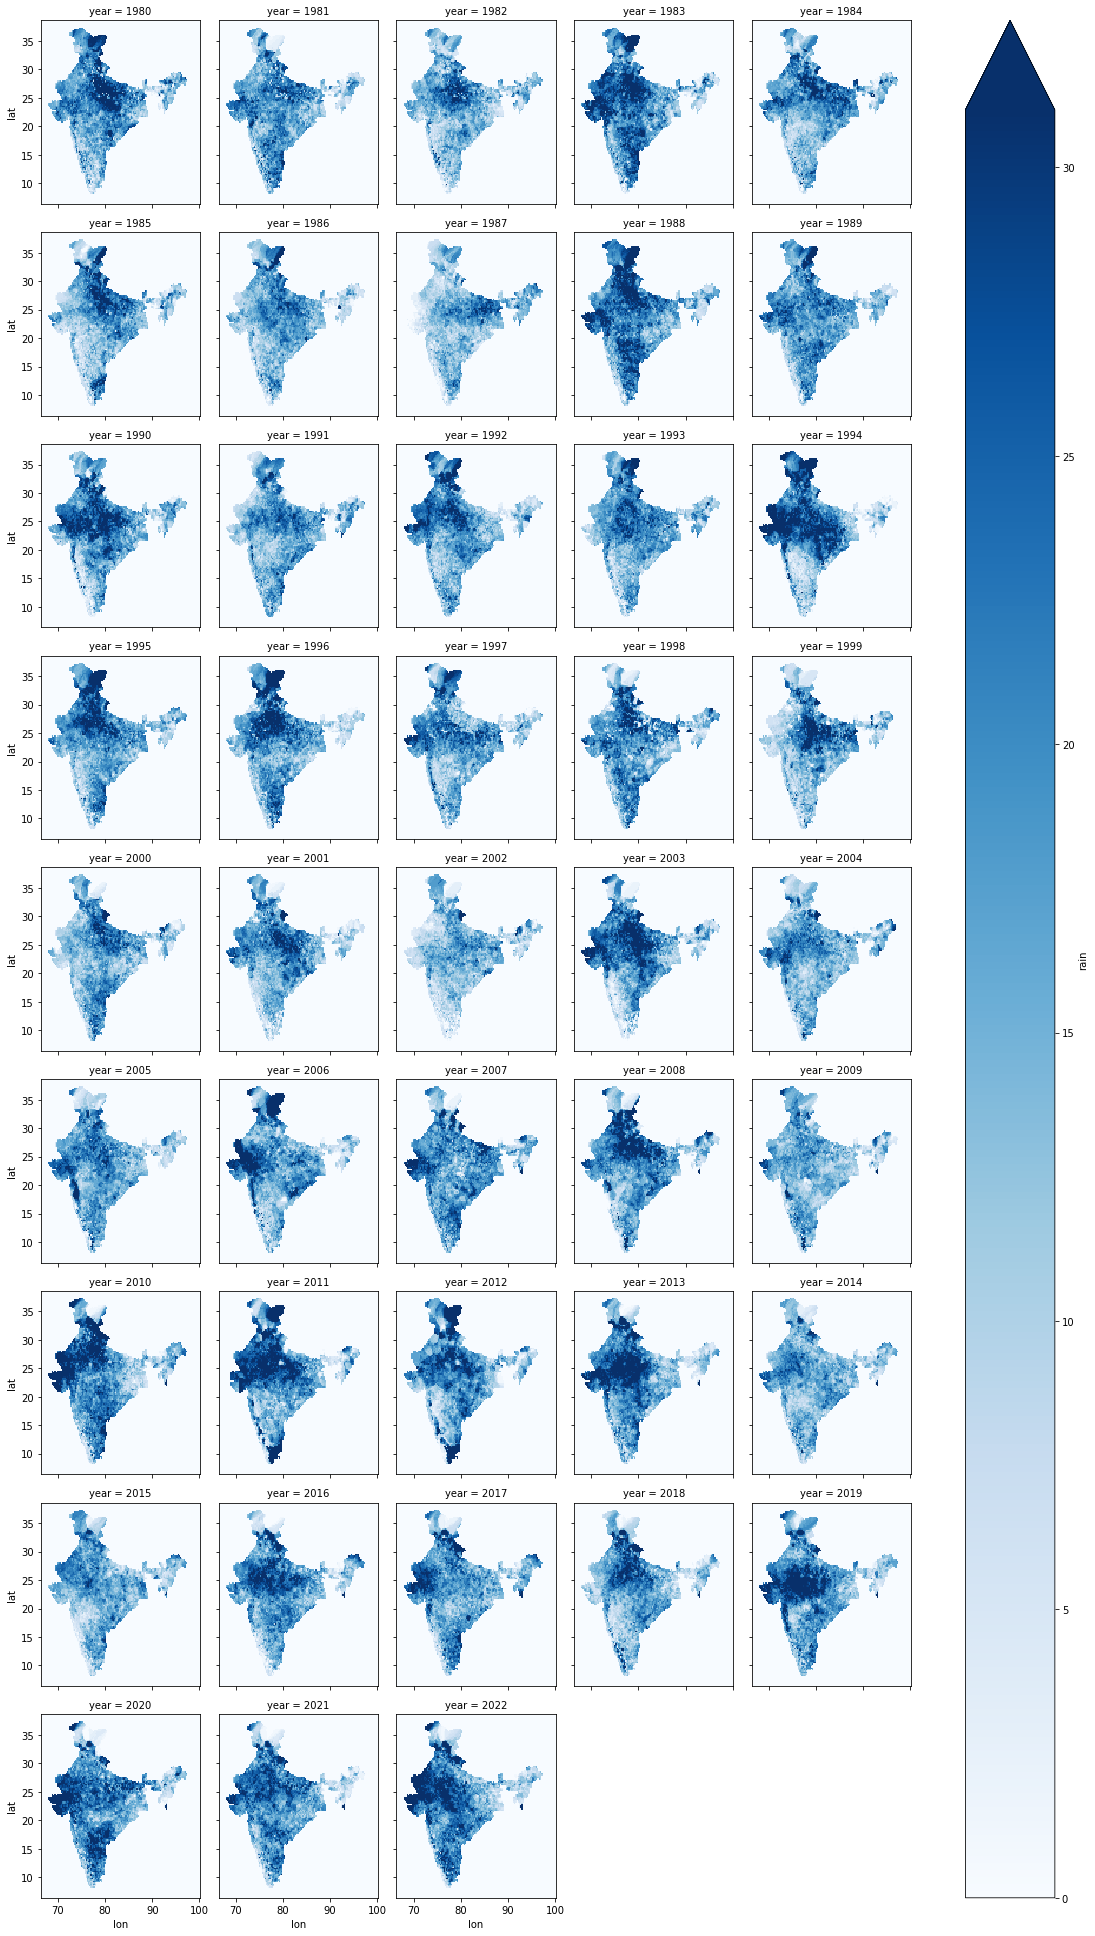

<Figure size 432x288 with 0 Axes>

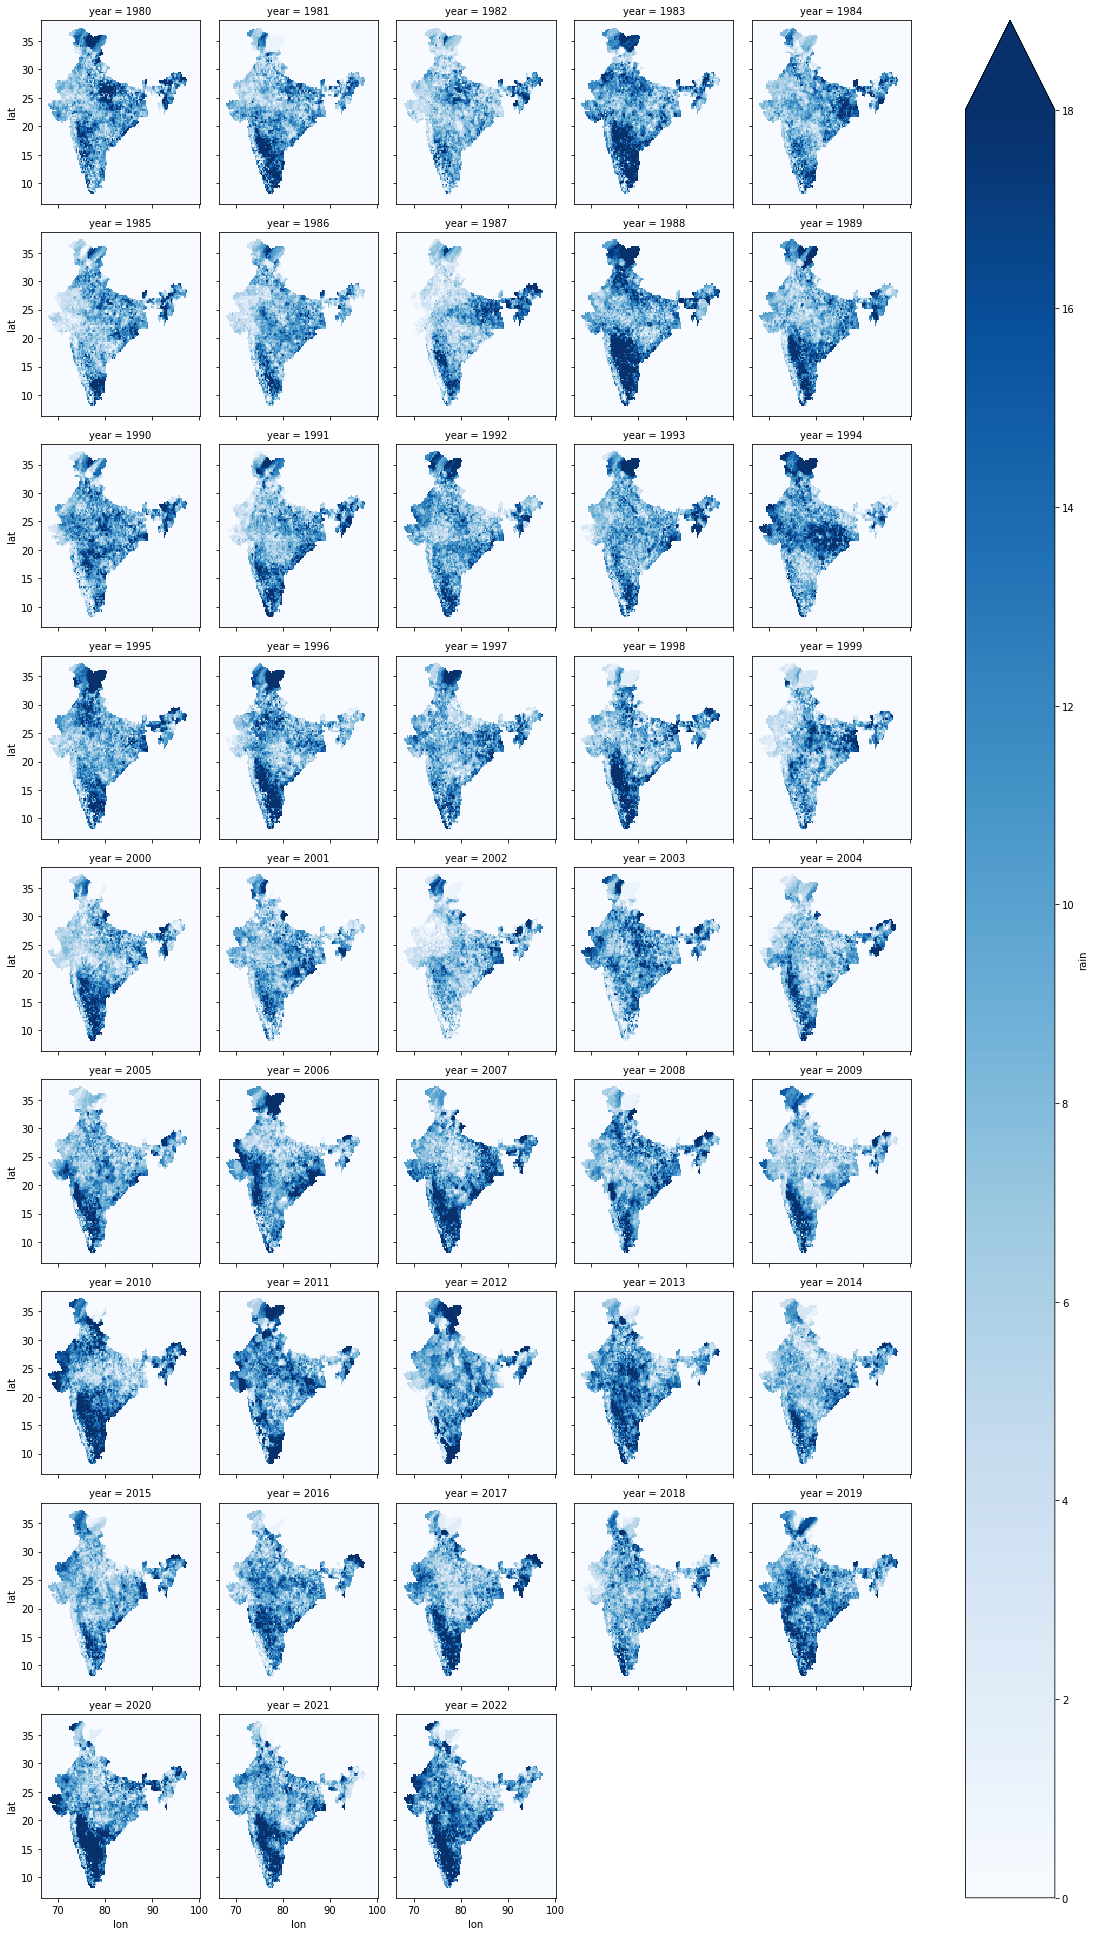

<Figure size 432x288 with 0 Axes>

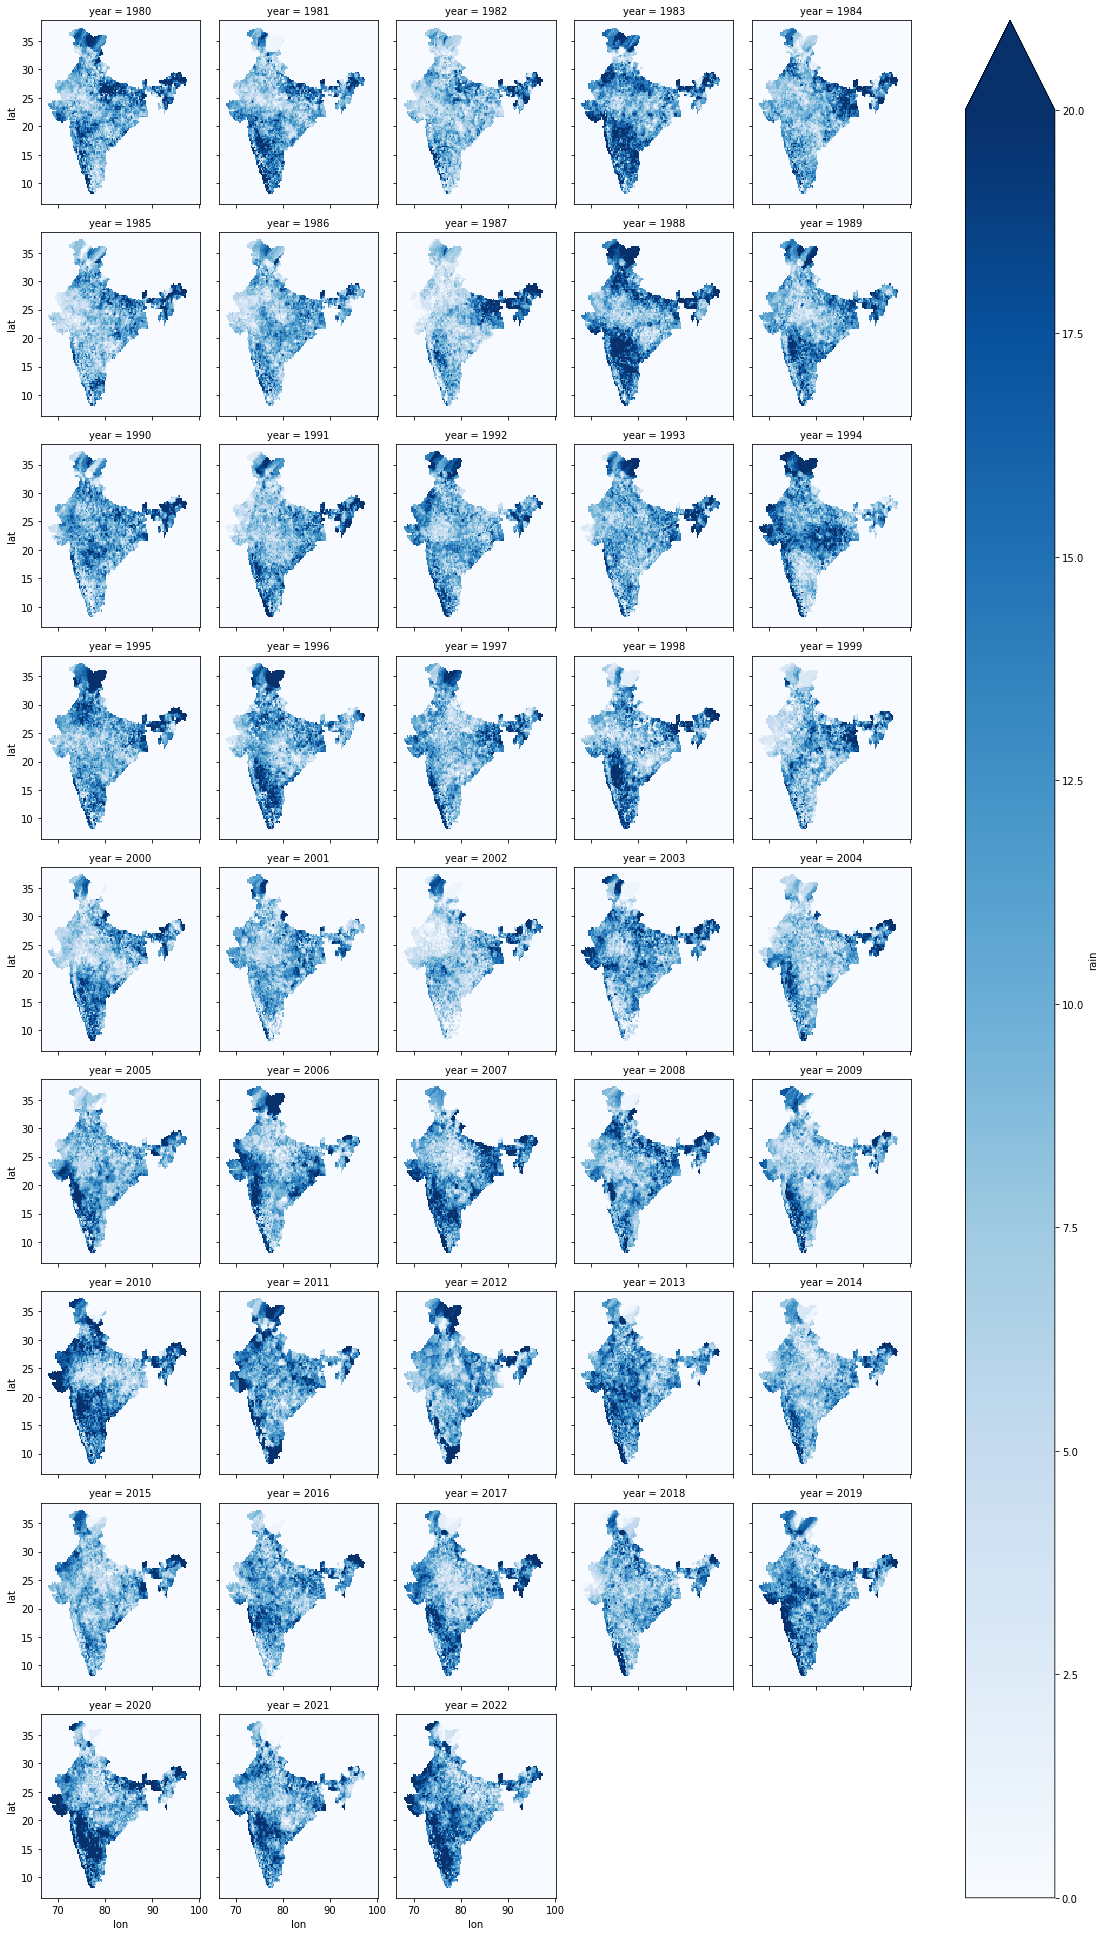

<Figure size 432x288 with 0 Axes>

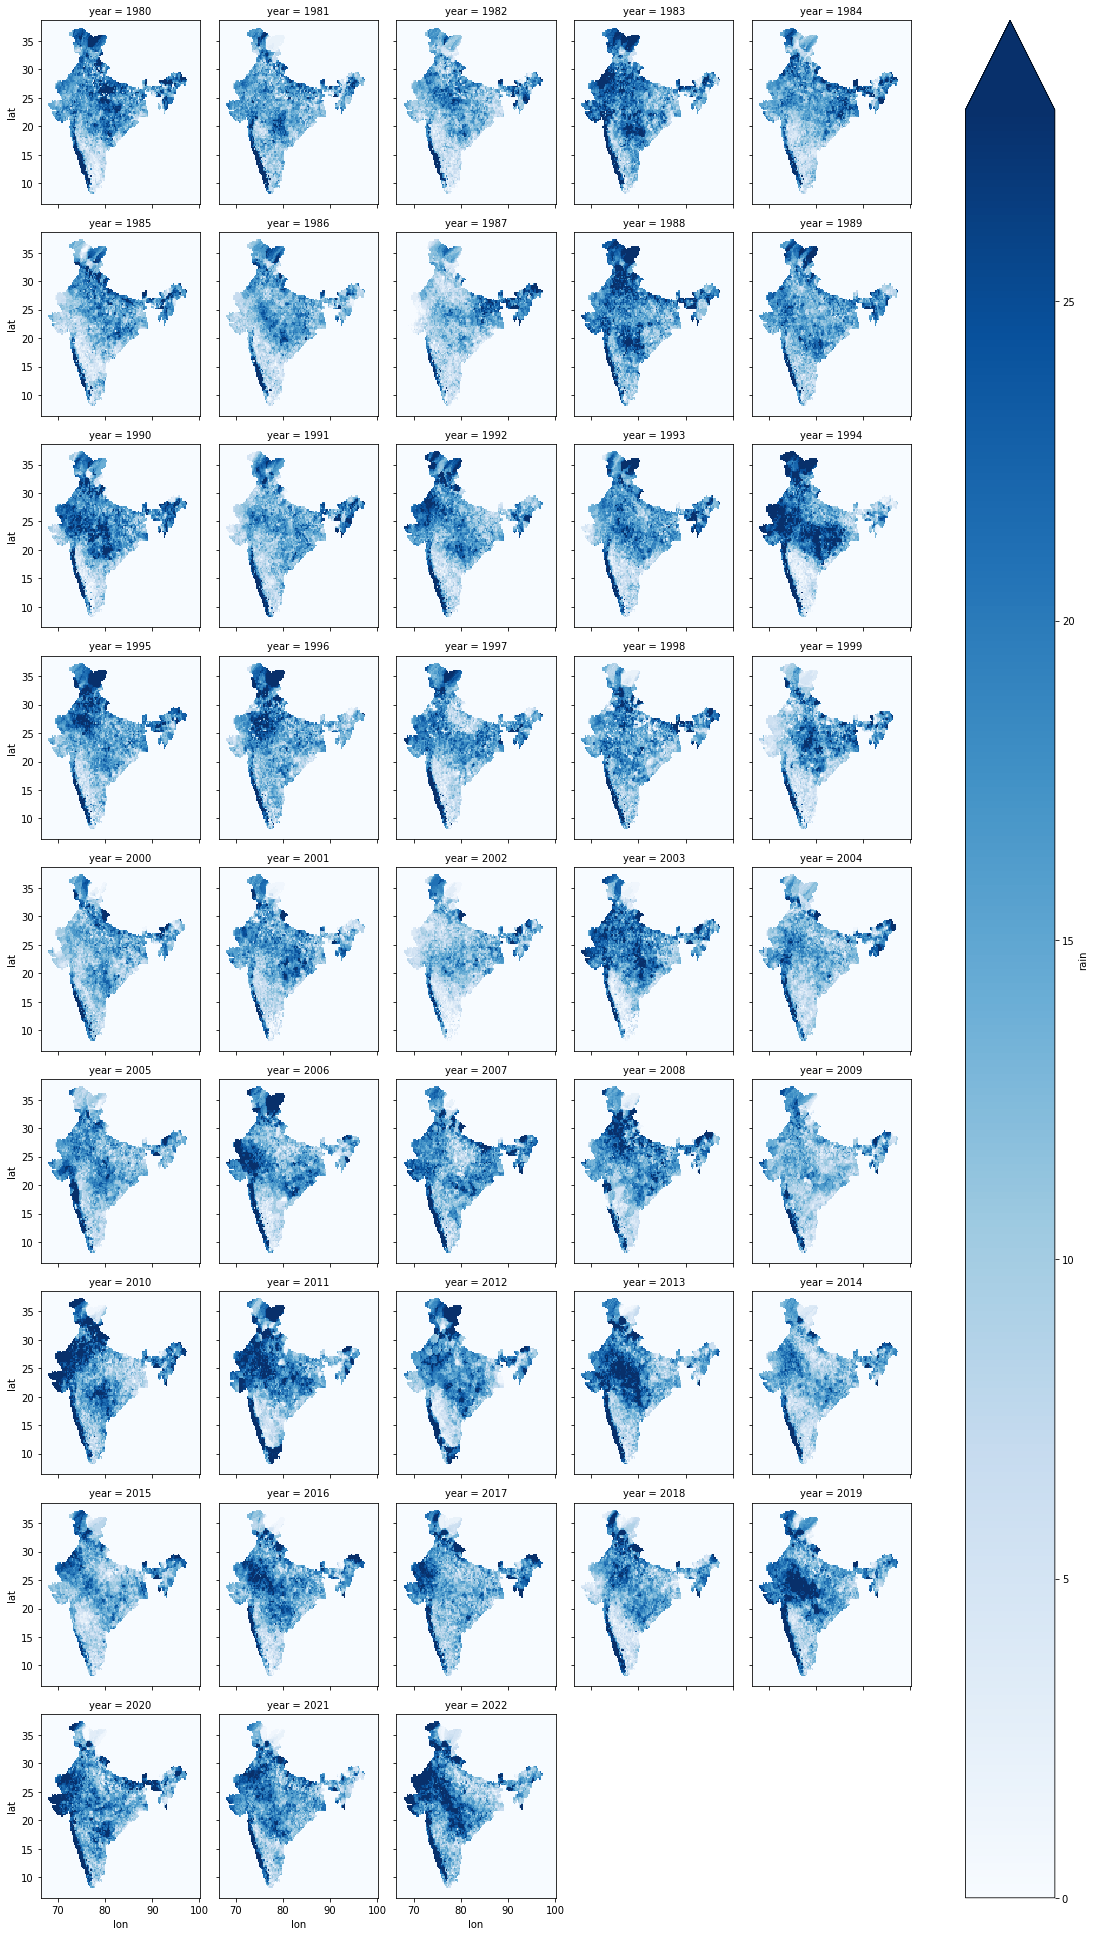

In [9]:

rain_90th_perc_monthly = ds_JJAS['rain'].groupby('time.month').quantile(0.9, dim='time')  # 90th percentile for each month of JJAS

rain_exceeds_90th_perc_monthly = ds_JJAS['rain'] > rain_90th_perc_monthly                 # binary mask for rainfall > 90th percentile for each month

rain_exceeds_90th_perc_monthly = rain_exceeds_90th_perc_monthly.compute()                 # Compute the variable 'rain_exceeds_90th_perc_monthly'


# Calculate the total number of days exceeding the 90th percentile by year and month

total_no_days_exceeds_90th_perc_monthly = rain_exceeds_90th_perc_monthly.groupby('time.year').sum(dim='time')


# Plotting for each month of JJAS for each year

for month in range(6, 10):
    plt.figure()
    subset = total_no_days_exceeds_90th_perc_monthly.sel(month=month)
    subset.plot(x='lon', y='lat', col='year', col_wrap=5, cmap='Blues', robust=True)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Month: {}'.format(month))
    plt.show()


### Total no. of events where there was a rainfall exceeding 90th percetnile for continuous days - monthwise


#########################  MEMORY ERROR   ############################  MEMORY ERROR   #########################################


import matplotlib.pyplot as plt

rain_90th_perc_monthly = ds_JJAS['rain'].groupby('time.month').quantile(0.9, dim='time')  # 90th percentile for each month of JJAS

rain_exceeds_90th_perc_monthly = ds_JJAS['rain'] > rain_90th_perc_monthly                 # binary mask for rainfall > 90th percentile for each month

rain_exceeds_90th_perc_monthly = rain_exceeds_90th_perc_monthly.compute()                 # Compute the variable 'rain_exceeds_90th_perc_monthly'


## Calculate the no. of events where there was consecutive rainfall exceeding 90th percentile

consecutive_events_monthly = (rain_exceeds_90th_perc_monthly & (rain_exceeds_90th_perc_monthly != rain_exceeds_90th_perc_monthly.shift(time=1))).groupby('time.year').cumsum(dim='time')

# consecutive_events_monthly = (rain_exceeds_90th_perc_monthly & & (rain_exceeds_90th_perc_monthly == rain_exceeds_90th_perc_monthly.shift(time=1)) & (rain_exceeds_90th_perc_monthly != rain_exceeds_90th_perc_monthly.shift(time=2))).groupby('time.year').cumsum(dim='time')


num_events_monthly = consecutive_events_monthly.groupby('time.year').max(dim='time')


# Plotting for each month of JJAS for each year

for month in range(6, 10):
    plt.figure()
    subset = num_events_monthly.sel(month=month)
    subset.plot(x='lon', y='lat', col='year', col_wrap=5, cmap='Blues', robust=True)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Month: {}'.format(month))
    plt.show()
